### S03 T01: Visualització gràfica d'un dataset

#### Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

+ **Una variable categòrica (UniqueCarrier)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline
import joypy
from joypy import joyplot

In [3]:
delayed = pd.read_csv('DelayedFlights.csv')

Per la variable 'UniqueCarrier' faré servir una gràfica de barres a mode de rànking per veure quines companyies tenen més vols, mostrant els vols de cada companyia. 

In [3]:
df = delayed['UniqueCarrier'].value_counts().to_dict()
# converteixo la sèrie resultant en dos arrays 
carriers = np.array(list(df.keys()))
flights = np.array(list(df.values()))

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

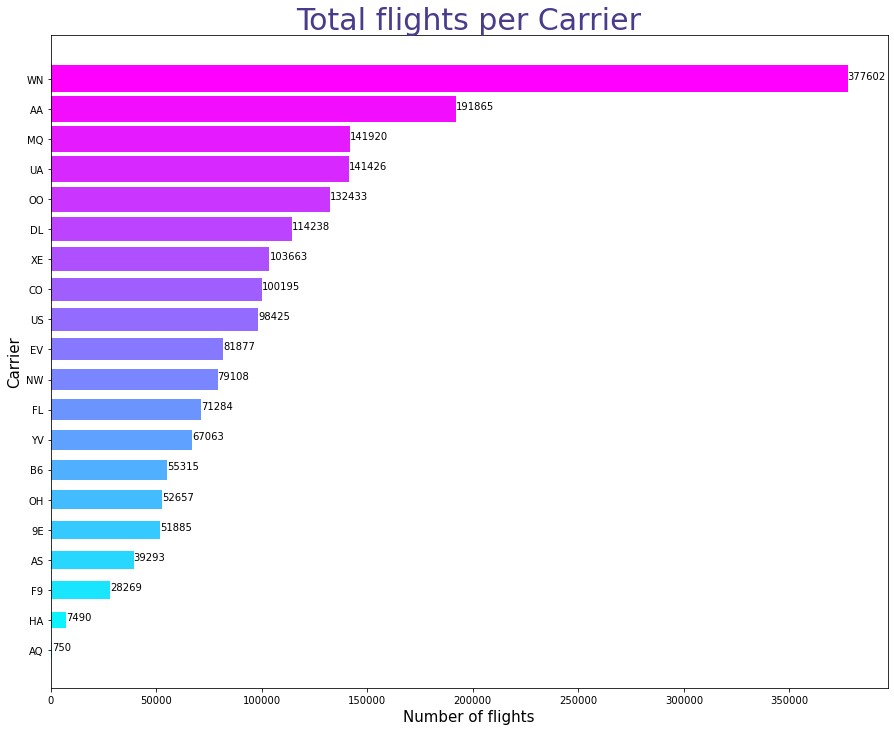

In [16]:
fig_1 = plt.figure( figsize = (15,12))
ax = plt.axes()

# mapa de colors que faig servir 
cmap = plt.get_cmap('cool')
clrs = cmap(np.linspace(1, 0, 20)) 

#genero una llista que es vagi fent més petita per aplicar a l'amplada de les barres 
height_list= []
h= 0.93
for i in range(20): 
    h= h-0.02
    h=round(h,3)
    height_list.append(h)

plt.barh(carriers, flights, height = height_list, color= clrs)
plt.xlabel("Number of flights", fontsize = 15)
plt.ylabel("Carrier", fontsize= 15)

# inverteixo el eix y perque vull que les companyies més grans surtin a la part superior 
plt.gca().invert_yaxis()
plt.title(label="Total flights per Carrier", 
          fontsize=30,
          c="#483D8B")

# per mostrar el nombre de vols dins el gràfic 
for index, value in enumerate(flights):
    plt.text(value, index, str(value))
plt

* **Una variable numèrica (ArrDelay)**

Farem una gràfica que ens mostri la distribució dels vols segons la columna 'ArrDelay', retard en l'arribada del vol. Per aquest gràfic farem servir Seaborn. 

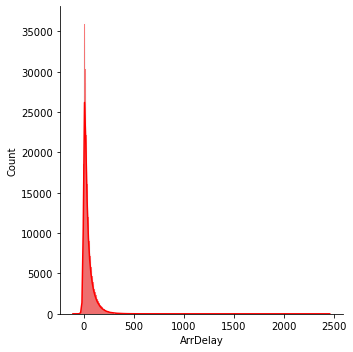

In [18]:
delays = delayed['ArrDelay']

sns.displot(data= delays, color = 'red', kde= True)

Veiem que les dades estan molt concentrades i que hi ha molt pocs vols que tinguin un retràs més gran de 1000 minuts. Contarem quants vols tenen més retràs dde 1000 minuts i els exclourem per poder visualitzar millor la distribució. 

In [19]:
delays_above_1000 = delayed[delayed['ArrDelay'] > 1000]
len(delays_above_1000)

188

Veiem que de tots els vols **només 188 tenen un retard de més de 1000 minuts**, els exclourem del gràfic.

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

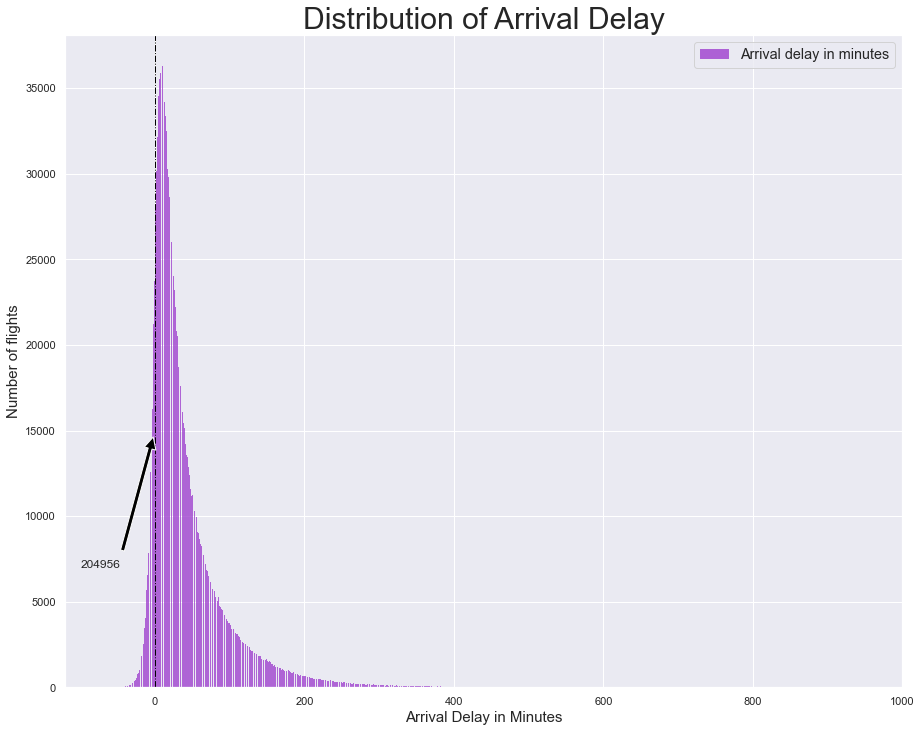

In [54]:

sns.set(style="darkgrid")
fig_dims = (15, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(data=delays, color='darkorchid')
fig_2 = ax.get_figure()
# treiem temps de delay majors de 1000  per veure millor la distribucio
plt.xlim(-120, 1000)

plt.legend(labels=["Arrival delay in minutes"], fontsize= 'large')
plt.title(label = "Distribution of Arrival Delay", fontsize = 30 )
plt.xlabel('Arrival Delay in Minutes', fontsize = 15)
plt.ylabel('Number of flights', fontsize = 15)
plt.axvline(x=0, color='black', lw= 1, ls='-.')

# contem els vols que no tenen retras pero posar-ho en el grèfic 
flights_no_delay = delayed[delayed['ArrDelay'] <=0]
len(flights_no_delay)

plt.annotate(len(flights_no_delay), xy= ( 0, 15000), xytext= (-100, 7000) , 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt

Veiem que de tots els vols analitzats (1936758) només 204956 han arribat sense retràs. 

* **Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**

Per aquestes variables farem un boxplot per cada companyia i calcularem el varlor mitjà de retràs de cadascuna per mostrar-ho al gràfic. 

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

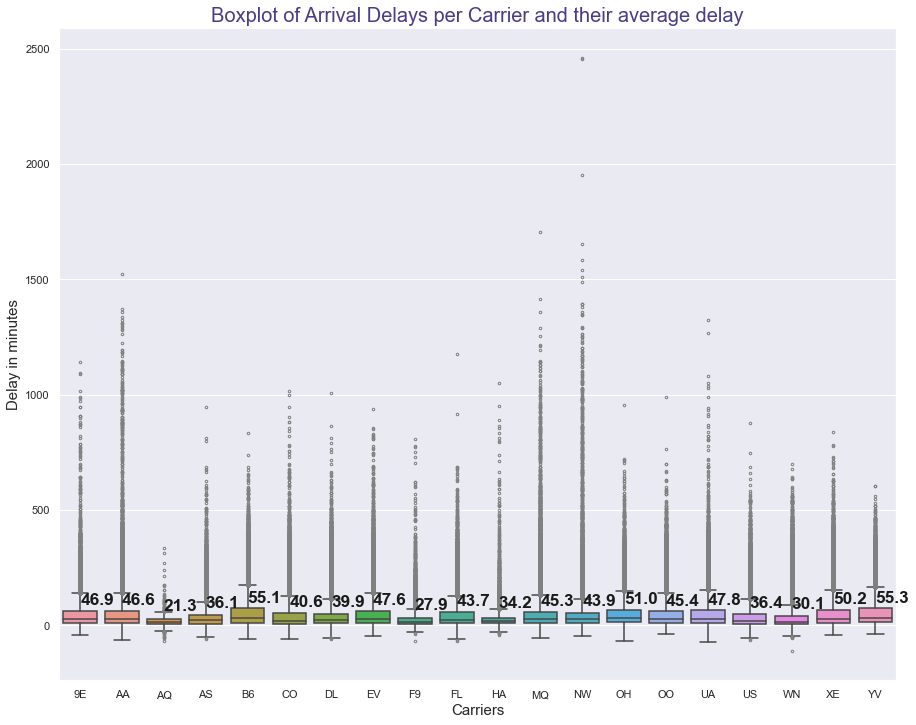

In [39]:
fig_3 = plt.figure( figsize = (15,12))

# calculem el temps mità de retràs per cada compnyia i ho arrodonim a 1 
means = round(delayed.groupby(['UniqueCarrier'])['ArrDelay'].mean(), 1)

#configurem les línes que representaran els valors outliers 
flierprops = dict(marker='.', markerfacecolor='None', markersize=5,  markeredgecolor='grey')

box_plot= sns.boxplot( x=delayed['UniqueCarrier'], y = delayed['ArrDelay'], 
                      flierprops = flierprops, order = means.index) 

# incloirem en el gràfic el valor mitjà de retràs 
vertical_offset = delayed['ArrDelay'].mean()
for xtick in box_plot.get_xticks():
     box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick],
                   horizontalalignment='left',size='x-large',color='k',weight='semibold')
        
plt.xlabel('Carriers', fontsize= 15 )
plt.ylabel('Delay in minutes', fontsize = 15)
plt.title(label="Boxplot of Arrival Delays per Carrier and their average delay", 
          fontsize=20,
          c="#483D8B")
plt

Veiem clarament aquí els valors atípics (vols que tenen un retàs molt elevat)

* **Dues variables numèriques (ArrDelay i DepDelay)**

Per aquesta gràfica farem servir un Scatterplot que ens mostrarà la relació entre les dos variables.

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

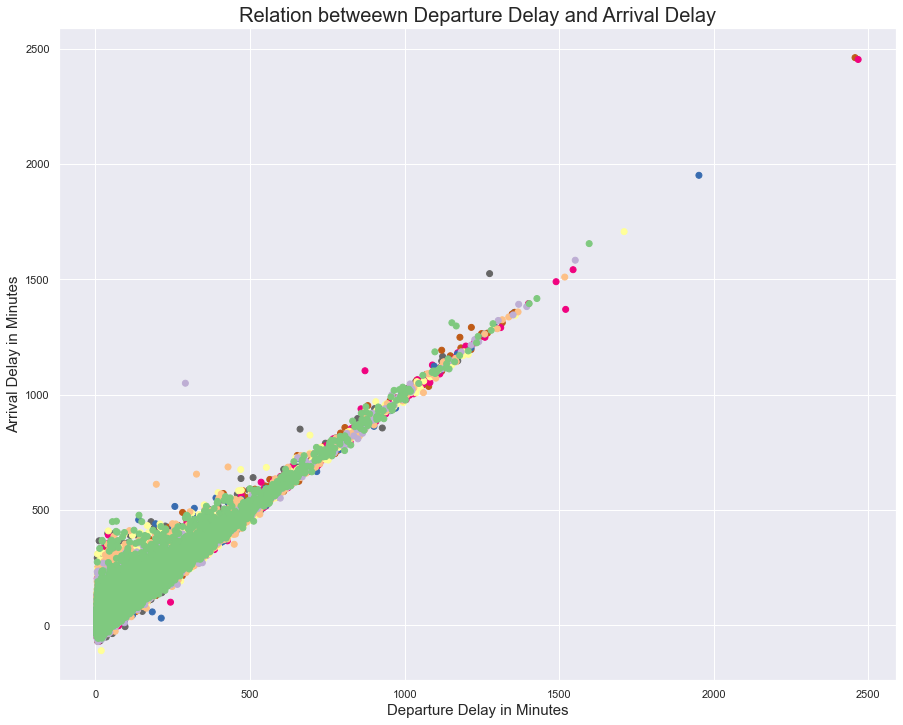

In [40]:
departure_delay = delayed['DepDelay']
arrival_delay = delayed['ArrDelay']

cmap = plt.get_cmap('Accent')
clrs = cmap(np.linspace(1, 0, 1936758)) 

fig_4 = plt.figure( figsize = (15,12))

plt.scatter(departure_delay, arrival_delay, color = clrs)
plt.xlabel('Departure Delay in Minutes', fontsize = 15)
plt.ylabel('Arrival Delay in Minutes', fontsize = 15)
plt.title('Relation betweewn Departure Delay and Arrival Delay', fontsize = 20)
plt

La relació entre retràs en la sortida i l'arribada és molt alta, les dues variables estan clarament relacionades. 

* **Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

Per aquest plot farem servir un boxplot. Per fer-ho i que ens separi les observacions segons si es retràs en la sortida o en l'arribada haurem juntar totes les observacions en una mateixa i crear una columna adicional que marqui quin tipus de retràs es. 

In [43]:
# agafem els retards de sortida per companyia i cambiem el nom de la columna per poder juntar-la després amb els retards 
# en l'arribada
delayed_departure = delayed[['UniqueCarrier', 'DepDelay']].copy()
delayed_departure.rename({'DepDelay': 'Delay'}, axis=1, inplace = True)

# creem una nova columna que es diu Type of delay que ens dirà si el retard es de sortida o d' arribada 
delayed_departure['Type of Delay'] = 'Departure Delay'

# ara fem el mateix amb el retras d'arribada 
delayed_arrival = delayed[['UniqueCarrier', 'ArrDelay']].copy()
delayed_arrival.rename({'ArrDelay' : 'Delay'},axis=1, inplace = True )
delayed_arrival['Type of Delay'] = 'Arrival Delay'

# ara juntem els dos dataframes en un, tndrem una columna amb temps de retras en general i una nova columna amb el tipus.
new_df = pd.concat([delayed_departure, delayed_arrival])


<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

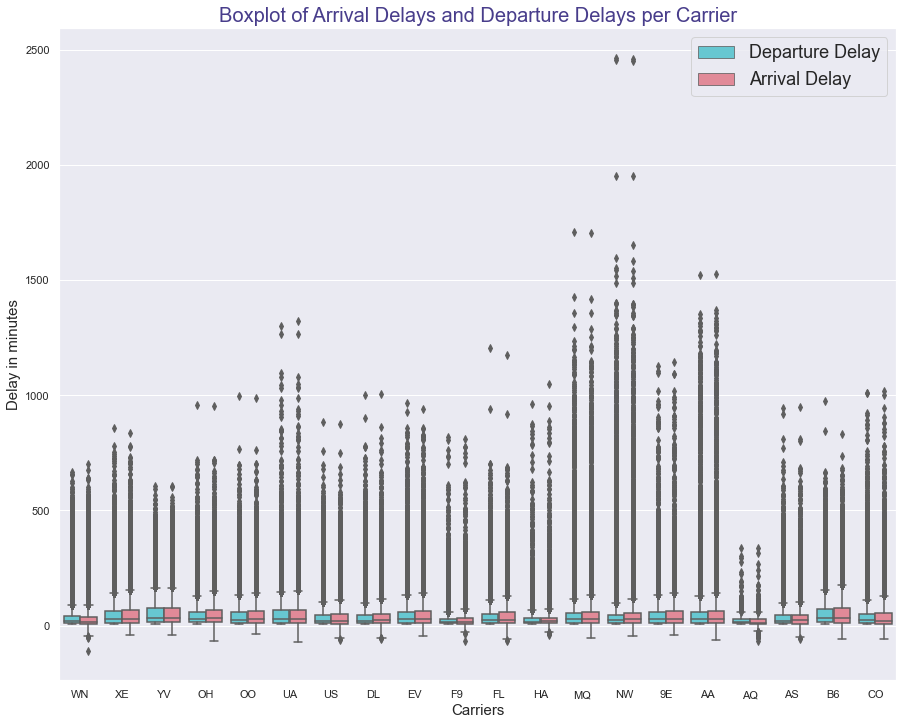

In [44]:
fig_5 = plt.figure( figsize = (15,12))

my_colors = {"Arrival Delay": "#ef7c8e", "Departure Delay": "#55d6e3"}
sns.boxplot( x=new_df['UniqueCarrier'], y = new_df['Delay'], hue=new_df['Type of Delay'], palette= my_colors) 
plt.xlabel('Carriers', fontsize= 15 )
plt.ylabel('Delay in minutes', fontsize = 15)
plt.title(label="Boxplot of Arrival Delays and Departure Delays per Carrier", 
          fontsize=20,
          c="#483D8B")
plt.legend(loc="upper right", frameon=True, fontsize= 18)
plt

* **Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)**


Per representar tantes variables farem servir un ridgeline plot, farem servir la llibreria joypy. 

<module 'matplotlib.pyplot' from 'C:\\Users\\eelee\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

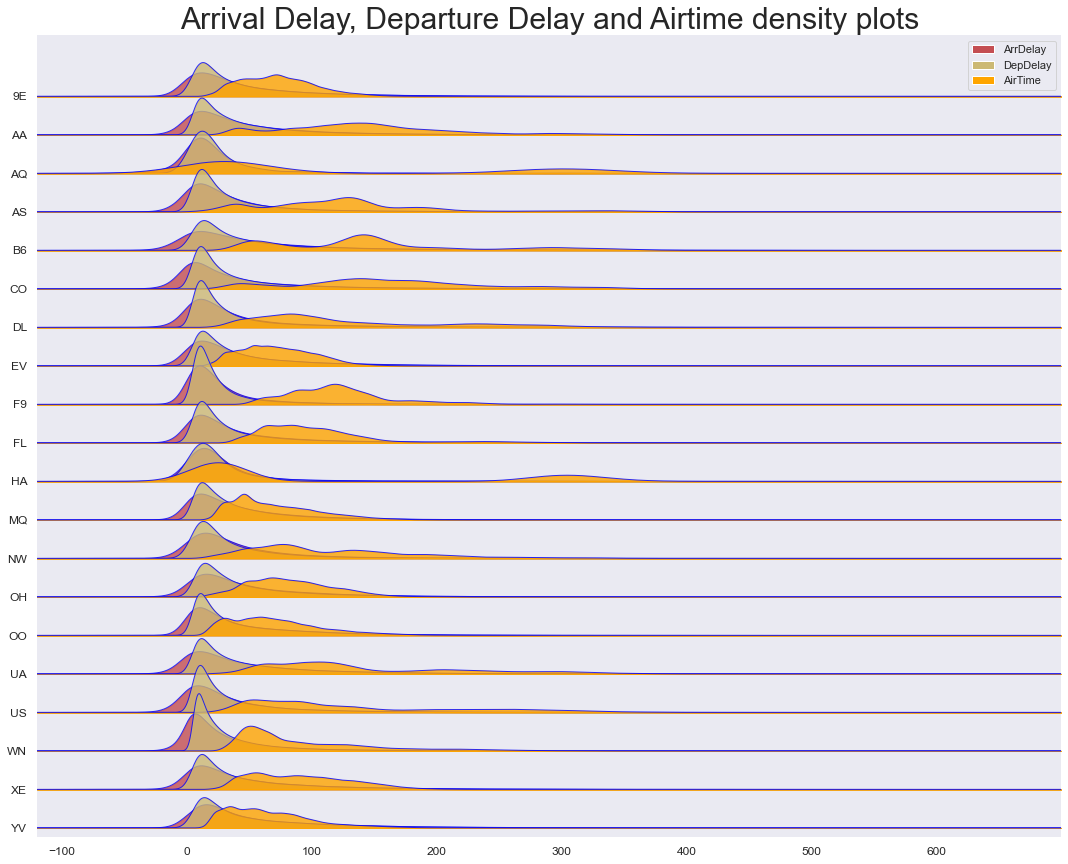

In [67]:
# fem una còpia del dataframe amb les columnes que ens interessen: 
ridge_df = delayed[['ArrDelay', 'DepDelay', 'AirTime', 'UniqueCarrier']].copy()

# per poder veure millor la distribució de totes les variables exclourem les observacions de més de 700 minuts de retràs

fig_6, axes = joypy.joyplot(ridge_df, by='UniqueCarrier', column = ['ArrDelay', 'DepDelay', 'AirTime'] , 
                         color = ['r', 'y', 'orange'], linecolor="blue", legend=True, fill=True,linewidth=1, figsize=(15,12), 
                         title="Arrival Delay, Departure Delay and Airtime",  x_range=[-120,700], alpha = 0.8)

plt.title("Arrival Delay, Departure Delay and Airtime density plots",  fontsize = 30)
plt

### Exercici 2

* **Exporta els gràfics com imatges o com html**

Exportare els gràfics com imatges: 

In [68]:
fig_1.savefig('plot1.png', bbox_inches='tight', pad_inches=1)
fig_2.savefig('plot2.png', bbox_inches='tight', pad_inches=1)
fig_3.savefig('plot3.png', bbox_inches='tight', pad_inches=1)
fig_4.savefig('plot4.png', bbox_inches='tight', pad_inches=1)
fig_5.savefig('plot5.png', bbox_inches='tight', pad_inches=1)
fig_6.figure.savefig('plot6.png', bbox_inches='tight', pad_inches=1)

### Exercici 3

* **Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.**

Integraré les imatges a **dins de la tasca 5**, que penjaré a GitHub junt amb aquesta. 